In [1]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
%matplotlib inline


#ML module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error, median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
data=pd.read_csv('HousingPrice.csv')

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,SaleType
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,Normal,208500,WD
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,Normal,181500,WD
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,Normal,223500,WD
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,Abnorml,140000,WD
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,Normal,250000,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Normal,175000,WD
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,Normal,210000,WD
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,Normal,266500,WD
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,Normal,142125,WD


In [4]:
data=data.drop(columns=['Id','SaleType'])
data=data.drop(columns=['MoSold','YrSold'])

In [5]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [6]:
data['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [7]:
data[['MSSubClass', 'SalePrice']].corr()

,MSSubClass,SalePrice
MSSubClass,1.000000,-0.084284
SalePrice,-0.084284,1.000000


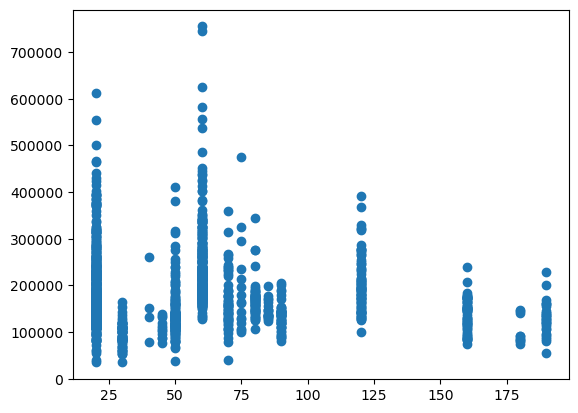

In [8]:
plt.scatter(x=data['MSSubClass'],y=data['SalePrice'])

In [9]:
data['MSZoning'].describe()

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

In [10]:
data['MSZoning'].describe()
data['MSZoning'].value_counts()
data[~data['MSZoning'].str.contains('RL|RM|FV|RH')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleCondition,SalePrice
30,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,172,0,0,0,NaN,MnPrv,NaN,0,Normal,40000
88,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,...,156,0,0,0,NaN,MnPrv,NaN,0,Abnorml,85000
93,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,99,0,NaN,NaN,NaN,0,Normal,133900
495,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,115,0,0,0,NaN,GdWo,NaN,0,Abnorml,34900
557,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,Inside,...,120,0,0,0,NaN,NaN,NaN,0,Normal,108000
711,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,Inside,...,98,0,0,0,NaN,NaN,NaN,0,Abnorml,102776
812,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,...,0,0,0,0,NaN,NaN,Shed,54,Alloca,55993
916,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,Abnorml,35311
1061,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,...,0,0,0,0,NaN,NaN,Shed,560,Normal,81000
1279,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,164,0,0,0,NaN,NaN,NaN,0,Abnorml,68400


In [11]:
data.shape

(1460, 77)

In [12]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
data=data[data['LotFrontage']<=200]

<Axes: >

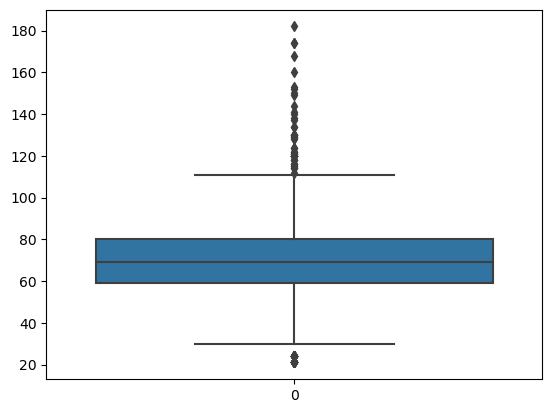

In [14]:
sns.boxplot(data['LotFrontage'])

In [15]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1193.000000,1199.000000,1199.000000,...,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,57.226856,69.644704,9891.954128,6.118432,5.561301,1970.557965,1985.152627,102.208718,422.713928,43.047540,...,1.763970,471.628857,89.259383,45.787323,22.768974,3.130942,15.053378,2.343620,25.532944,180736.736447
std,43.128920,22.181762,7759.314333,1.415742,1.094547,31.756951,21.194998,184.445535,439.848427,154.612382,...,0.778576,219.661999,120.402145,65.736388,61.704267,28.798860,56.029465,36.369285,189.938155,83438.182989
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,59.000000,7417.500000,5.000000,5.000000,1950.000000,1965.500000,0.000000,0.000000,0.000000,...,1.000000,308.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127500.000000
50%,50.000000,69.000000,9250.000000,6.000000,5.000000,1972.000000,1995.000000,0.000000,351.000000,0.000000,...,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159434.000000
75%,70.000000,80.000000,11241.500000,7.000000,6.000000,2003.000000,2004.000000,160.000000,690.000000,0.000000,...,2.000000,577.500000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,213495.000000
max,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,...,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,3500.000000,755000.000000


In [16]:
#max=16977
#min=1681
data[data['LotArea']>=35000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleCondition,SalePrice
53,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,Normal,385000
271,20,RL,73.0,39104,Pave,NaN,IR1,Low,AllPub,CulDSac,...,0,0,0,0,NaN,NaN,NaN,0,Normal,241500
313,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,Normal,375000
451,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,Normal,280000
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,Partial,184750
661,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,0,0,0,0,NaN,NaN,NaN,0,Normal,402000
769,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,...,0,0,210,0,NaN,NaN,NaN,0,Normal,538000
848,50,RL,75.0,45600,Pave,NaN,IR2,Bnk,AllPub,Inside,...,0,0,175,0,NaN,NaN,NaN,0,Normal,240000
1169,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,NaN,NaN,NaN,0,Normal,625000
1184,20,RL,50.0,35133,Grvl,NaN,Reg,Lvl,AllPub,Inside,...,0,0,263,0,NaN,NaN,NaN,0,Normal,186700


In [17]:
data['Street'].value_counts()

Street
Pave    1194
Grvl       5
Name: count, dtype: int64

In [18]:
data['Alley'].isna().sum()

1113

In [19]:
data['Alley']=data['Alley'].fillna('NAA')

In [20]:
data['Alley'].value_counts()

Alley
NAA     1113
Grvl      47
Pave      39
Name: count, dtype: int64

In [21]:
data['LotShape'].value_counts()

LotShape
Reg    851
IR1    317
IR2     25
IR3      6
Name: count, dtype: int64

In [22]:
data['LandContour'].value_counts()

LandContour
Lvl    1082
Bnk      55
HLS      45
Low      17
Name: count, dtype: int64

In [23]:
data['Utilities'].describe()
data['Utilities'].isna().sum()

0

In [24]:
data['LotConfig'].describe()

count       1199
unique         5
top       Inside
freq         917
Name: LotConfig, dtype: object

In [25]:
data['LandSlope'].describe()
#data['LandSlope'].value_counts()

count     1199
unique       3
top        Gtl
freq      1147
Name: LandSlope, dtype: object

In [26]:
data['Neighborhood'].describe()
#data['Neighborhood'].value_counts()

count      1199
unique       25
top       NAmes
freq        185
Name: Neighborhood, dtype: object

In [27]:
data['Condition1'].describe()
data['Condition1'].value_counts()

Condition1
Norm      1037
Feedr       66
Artery      46
RRAn        24
RRAe         9
PosN         9
RRNn         4
PosA         3
RRNe         1
Name: count, dtype: int64

In [28]:
data['Condition2'].describe()
data['Condition2'].value_counts()

Condition2
Norm      1186
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
Name: count, dtype: int64

In [29]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [30]:
data['BldgType'].describe()
data['BldgType'].value_counts()

BldgType
1Fam      992
TwnhsE     92
Duplex     47
Twnhs      40
2fmCon     28
Name: count, dtype: int64

In [31]:
data['HouseStyle'].describe()
data['HouseStyle'].value_counts()

HouseStyle
1Story    597
2Story    361
1.5Fin    136
SLvl       44
SFoyer     30
1.5Unf     13
2.5Unf     10
2.5Fin      8
Name: count, dtype: int64

In [32]:
for cl in data.columns:
    print(cl,': ',data[cl].isna().sum())

MSSubClass :  0
MSZoning :  0
LotFrontage :  0
LotArea :  0
Street :  0
Alley :  0
LotShape :  0
LandContour :  0
Utilities :  0
LotConfig :  0
LandSlope :  0
Neighborhood :  0
Condition1 :  0
Condition2 :  0
BldgType :  0
HouseStyle :  0
OverallQual :  0
OverallCond :  0
YearBuilt :  0
YearRemodAdd :  0
RoofStyle :  0
RoofMatl :  0
Exterior1st :  0
Exterior2nd :  0
MasVnrType :  733
MasVnrArea :  6
ExterQual :  0
ExterCond :  0
Foundation :  0
BsmtQual :  31
BsmtCond :  31
BsmtExposure :  32
BsmtFinType1 :  31
BsmtFinSF1 :  0
BsmtFinType2 :  32
BsmtFinSF2 :  0
BsmtUnfSF :  0
TotalBsmtSF :  0
Heating :  0
HeatingQC :  0
CentralAir :  0
Electrical :  1
1stFlrSF :  0
2ndFlrSF :  0
LowQualFinSF :  0
GrLivArea :  0
BsmtFullBath :  0
BsmtHalfBath :  0
FullBath :  0
HalfBath :  0
BedroomAbvGr :  0
KitchenAbvGr :  0
KitchenQual :  0
TotRmsAbvGrd :  0
Functional :  0
Fireplaces :  0
FireplaceQu :  600
GarageType :  74
GarageYrBlt :  74
GarageFinish :  74
GarageCars :  0
GarageArea :  0
GarageQ

In [33]:
#data['MasVnrType'].describe()
data['MasVnrType'].value_counts()
data['MasVnrType'].describe()
data[data['MasVnrArea'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleCondition,SalePrice
650,60,FV,65.0,8125,Pave,NAA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,Normal,205950
936,20,RL,67.0,10083,Pave,NAA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,Normal,184900
973,20,FV,95.0,11639,Pave,NAA,Reg,Lvl,AllPub,Corner,...,0,0,0,0,NaN,NaN,NaN,0,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,Partial,199900
1243,20,RL,107.0,13891,Pave,NAA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,Partial,465000
1278,60,RL,75.0,9473,Pave,NAA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,Normal,237000


In [34]:
data['MasVnrType']=data['MasVnrType'].fillna('NoMasonry')
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

In [35]:
data['BsmtQual']=data['BsmtQual'].fillna('NoBasement')
data['BsmtCond']=data['BsmtCond'].fillna('NoBasement')

In [36]:
data['BsmtExposure'].value_counts()

BsmtExposure
No    793
Av    182
Gd    101
Mn     91
Name: count, dtype: int64

In [37]:
data['BsmtExposure']=data['BsmtExposure'].fillna('NoBasement')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NoBasement')#BsmtFinType2 
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NoBasement')
data['Electrical']=data['Electrical'].fillna('SBrkr')
data['FireplaceQu']=data['FireplaceQu'].fillna('No')
data['GarageType']=data['GarageType'].fillna('No Garage')
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)
data['GarageFinish']=data['GarageFinish'].fillna('No Garage')
data['GarageQual']=data['GarageQual'].fillna('No Garage')
data['GarageCond']=data['GarageCond'].fillna('No Garage')
data['PoolQC']=data['PoolQC'].fillna('No Pool')
data['Fence']=data['Fence'].fillna('No Fence')
data['MiscFeature']=data['MiscFeature'].fillna('No')

In [38]:
data['Electrical'].value_counts()

Electrical
SBrkr    1090
FuseA      80
FuseF      25
FuseP       3
Mix         1
Name: count, dtype: int64

In [39]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NAA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,No Pool,No Fence,No,0,Normal,208500
1,20,RL,80.0,9600,Pave,NAA,Reg,Lvl,AllPub,FR2,...,0,0,0,0,No Pool,No Fence,No,0,Normal,181500
2,60,RL,68.0,11250,Pave,NAA,IR1,Lvl,AllPub,Inside,...,0,0,0,0,No Pool,No Fence,No,0,Normal,223500
3,70,RL,60.0,9550,Pave,NAA,IR1,Lvl,AllPub,Corner,...,272,0,0,0,No Pool,No Fence,No,0,Abnorml,140000
4,60,RL,84.0,14260,Pave,NAA,IR1,Lvl,AllPub,FR2,...,0,0,0,0,No Pool,No Fence,No,0,Normal,250000


In [40]:
#data[data.columns].corr()

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

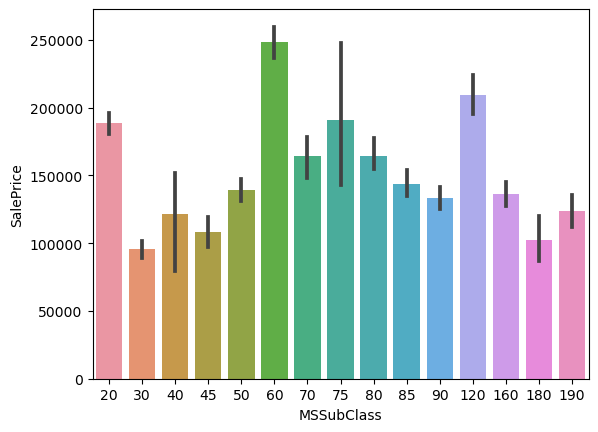

In [41]:
sns.barplot(x='MSSubClass',y='SalePrice',data=data)

In [42]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NAA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,No Pool,No Fence,No,0,Normal,208500
1,20,RL,80.0,9600,Pave,NAA,Reg,Lvl,AllPub,FR2,...,0,0,0,0,No Pool,No Fence,No,0,Normal,181500
2,60,RL,68.0,11250,Pave,NAA,IR1,Lvl,AllPub,Inside,...,0,0,0,0,No Pool,No Fence,No,0,Normal,223500
3,70,RL,60.0,9550,Pave,NAA,IR1,Lvl,AllPub,Corner,...,272,0,0,0,No Pool,No Fence,No,0,Abnorml,140000
4,60,RL,84.0,14260,Pave,NAA,IR1,Lvl,AllPub,FR2,...,0,0,0,0,No Pool,No Fence,No,0,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NAA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,No Pool,No Fence,No,0,Normal,175000
1456,20,RL,85.0,13175,Pave,NAA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,No Pool,MnPrv,No,0,Normal,210000
1457,70,RL,66.0,9042,Pave,NAA,Reg,Lvl,AllPub,Inside,...,0,0,0,0,No Pool,GdPrv,Shed,2500,Normal,266500
1458,20,RL,68.0,9717,Pave,NAA,Reg,Lvl,AllPub,Inside,...,112,0,0,0,No Pool,No Fence,No,0,Normal,142125


In [43]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,...,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,57.226856,69.644704,9891.954128,6.118432,5.561301,1970.557965,1985.152627,101.697248,422.713928,43.047540,...,1.763970,471.628857,89.259383,45.787323,22.768974,3.130942,15.053378,2.343620,25.532944,180736.736447
std,43.128920,22.181762,7759.314333,1.415742,1.094547,31.756951,21.194998,184.124493,439.848427,154.612382,...,0.778576,219.661999,120.402145,65.736388,61.704267,28.798860,56.029465,36.369285,189.938155,83438.182989
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,59.000000,7417.500000,5.000000,5.000000,1950.000000,1965.500000,0.000000,0.000000,0.000000,...,1.000000,308.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127500.000000
50%,50.000000,69.000000,9250.000000,6.000000,5.000000,1972.000000,1995.000000,0.000000,351.000000,0.000000,...,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159434.000000
75%,70.000000,80.000000,11241.500000,7.000000,6.000000,2003.000000,2004.000000,159.000000,690.000000,0.000000,...,2.000000,577.500000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,213495.000000
max,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,...,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,3500.000000,755000.000000


In [44]:
t=data.columns
print(len(t))

77


In [45]:
CategoricalFeature=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC',
       'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu', 'GarageType','GarageFinish','GarageQual','PavedDrive','GarageCond',
       'PavedDrive','PoolQC', 'Fence', 'MiscFeature','SaleCondition']

In [46]:
Numaricalfeature=[]
for cl in data.columns:
    if cl not in CategoricalFeature:
        Numaricalfeature.append(cl)
print(Numaricalfeature)        

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [47]:
print('Numarical- ',len(Numaricalfeature))
print('Categorical- ',len(CategoricalFeature))
print('total: ',len(Numaricalfeature+CategoricalFeature))

Numarical-  32
Categorical-  46
total:  78


In [48]:
for cl in data.columns:
    if (cl not in Numaricalfeature) & (cl not in CategoricalFeature):
        print(cl)

In [49]:
data[Numaricalfeature].corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.392666,0.127502,0.078183,0.182677,0.162047,0.059771,0.156676,0.355729,0.411274,...,0.307518,0.340161,0.094366,0.139649,0.018473,0.078721,0.050259,0.122121,0.006148,0.381130
LotArea,0.392666,1.000000,0.044571,0.031557,0.097254,0.182895,0.143361,0.026069,0.269574,0.300509,...,0.189361,0.202092,0.139145,0.080028,-0.026262,0.015917,0.081280,0.043817,0.004574,0.318429
YearBuilt,0.127502,0.044571,1.000000,0.596957,0.337647,0.258940,-0.038962,0.169057,0.433339,0.335003,...,0.542792,0.498400,0.242137,0.197978,-0.401446,0.032189,-0.045451,-0.002158,-0.093136,0.539834
YearRemodAdd,0.078183,0.031557,0.596957,1.000000,0.191906,0.133460,-0.049068,0.191647,0.323413,0.284069,...,0.426024,0.387962,0.237694,0.249449,-0.199826,0.027944,-0.026073,0.009818,-0.059292,0.519675
MasVnrArea,0.182677,0.097254,0.337647,0.191906,1.000000,0.269702,-0.068826,0.112115,0.373336,0.354797,...,0.372125,0.372358,0.179732,0.108147,-0.120439,0.026226,0.062175,-0.015721,-0.051683,0.496303
BsmtFinSF1,0.162047,0.182895,0.258940,0.133460,0.269702,1.000000,-0.031849,-0.519184,0.476048,0.418331,...,0.229522,0.271385,0.217182,0.094023,-0.112015,0.026349,0.070837,0.085899,-0.009353,0.428800
BsmtFinSF2,0.059771,0.143361,-0.038962,-0.049068,-0.068826,-0.031849,1.000000,-0.213983,0.105057,0.081016,...,-0.040701,-0.020245,0.037995,0.006060,0.037469,-0.029350,0.069530,0.068426,0.007730,-0.017575
BsmtUnfSF,0.156676,0.026069,0.169057,0.191647,0.112115,-0.519184,-0.213983,1.000000,0.442024,0.340275,...,0.243886,0.216608,0.004086,0.146539,-0.040640,0.021892,-0.003602,-0.052128,-0.051156,0.215716
TotalBsmtSF,0.355729,0.269574,0.433339,0.323413,0.373336,0.476048,0.105057,0.442024,1.000000,0.823659,...,0.481403,0.503408,0.243451,0.254856,-0.145547,0.039804,0.095014,0.058866,-0.061034,0.666716
1stFlrSF,0.411274,0.300509,0.335003,0.284069,0.354797,0.418331,0.081016,0.340275,0.823659,1.000000,...,0.479442,0.501156,0.249461,0.211713,-0.127045,0.043154,0.101338,0.061976,-0.051571,0.645257


In [50]:
negetivecol=[]
for cl in Numaricalfeature:
    co=data[['SalePrice',cl]].corr().iloc[0, 1]
    if co>0.2:
        print(cl,': ',co)
    else: 
        negetivecol.append(cl)

LotFrontage :  0.38112957748845483
LotArea :  0.3184286252121563
YearBuilt :  0.53983432579803
YearRemodAdd :  0.5196748396235072
MasVnrArea :  0.4963025333944402
BsmtFinSF1 :  0.4287997743802054
BsmtUnfSF :  0.215716169057351
TotalBsmtSF :  0.6667160645074302
1stFlrSF :  0.6452565516370744
2ndFlrSF :  0.31014013438770394
GrLivArea :  0.7236264522311512
BsmtFullBath :  0.23870329833523213
FullBath :  0.5669157811974899
HalfBath :  0.28581026237421187
TotRmsAbvGrd :  0.5401777285489852
Fireplaces :  0.4829667036334
GarageYrBlt :  0.26204066407905174
GarageCars :  0.6473916226876519
GarageArea :  0.6376003040526854
WoodDeckSF :  0.34604375039813057
OpenPorchSF :  0.329788263994252
SalePrice :  1.0


In [51]:
negetivecol

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [52]:
data=data.drop(columns=negetivecol)
data=data.drop(columns=['MiscFeature','PoolQC','BsmtFinType2'])#categorical col releted negetivecorr col
for negcol in negetivecol:
    if negcol in Numaricalfeature:
        Numaricalfeature.remove(negcol)
for catcol in CategoricalFeature:
    if catcol in ['MiscFeature','PoolQC','BsmtFinType2']:
        CategoricalFeature.remove(catcol)
        #data=data.drop(columns=['MiscFeature','PoolQC','BsmtFinType2'])

In [53]:
print('Numarical- ',len(Numaricalfeature))
print('Categorical- ',len(CategoricalFeature))

Numarical-  22
Categorical-  43


In [54]:
#data=data.drop(columns=['MiscFeature','PoolQC','BsmtFinType2'])

In [55]:
'Fence' in CategoricalFeature

True

In [56]:
len(CategoricalFeature)

43

In [57]:
#colums releted to low correlation percentege column


In [58]:
data.groupby('KitchenQual')['SalePrice'].mean()

KitchenQual
Ex    334027.602151
Fa    105872.657143
Gd    212553.468085
TA    136494.354409
Name: SalePrice, dtype: float64

In [59]:
ordinal_features = ['MSSubClass', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                    'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 
                    'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

In [60]:
len(ordinal_features)

19

In [61]:
for ordi in ordinal_features:
    if ordi not in data.columns:
        ordinal_features.remove(ordi)

In [62]:
len(ordinal_features)

17

In [63]:
nominal_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 
                    'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 
                    'SaleCondition']


In [64]:
len(nominal_features)

26

In [65]:
for moni in nominal_features:
    if moni not in data.columns:
        nominal_features.remove(moni)

In [66]:
len(nominal_features)

25

In [67]:
for numcol in CategoricalFeature:
    if (numcol in nominal_features):
        print('nominal_features ',numcol)
    elif(numcol in ordinal_features) :
        print('ordinal_features ',numcol)
    else:
        print('Non of the above- ',numcol)

ordinal_features  MSSubClass
nominal_features  MSZoning
nominal_features  Street
nominal_features  Alley
nominal_features  LotShape
nominal_features  LandContour
nominal_features  Utilities
nominal_features  LotConfig
nominal_features  LandSlope
nominal_features  Neighborhood
nominal_features  Condition1
nominal_features  Condition2
nominal_features  BldgType
nominal_features  HouseStyle
ordinal_features  OverallQual
ordinal_features  OverallCond
nominal_features  RoofStyle
nominal_features  RoofMatl
nominal_features  Exterior1st
nominal_features  Exterior2nd
nominal_features  MasVnrType
ordinal_features  ExterQual
ordinal_features  ExterCond
nominal_features  Foundation
ordinal_features  BsmtQual
ordinal_features  BsmtCond
ordinal_features  BsmtExposure
ordinal_features  BsmtFinType1
nominal_features  Heating
ordinal_features  HeatingQC
nominal_features  CentralAir
nominal_features  Electrical
ordinal_features  KitchenQual
ordinal_features  Functional
ordinal_features  FireplaceQu
nom

In [68]:
#data[('Fence','SaleCondition')]

data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NAA,Reg,Lvl,AllPub,Inside,...,2,548,TA,TA,Y,0,61,No Fence,Normal,208500
1,20,RL,80.0,9600,Pave,NAA,Reg,Lvl,AllPub,FR2,...,2,460,TA,TA,Y,298,0,No Fence,Normal,181500
2,60,RL,68.0,11250,Pave,NAA,IR1,Lvl,AllPub,Inside,...,2,608,TA,TA,Y,0,42,No Fence,Normal,223500
3,70,RL,60.0,9550,Pave,NAA,IR1,Lvl,AllPub,Corner,...,3,642,TA,TA,Y,0,35,No Fence,Abnorml,140000
4,60,RL,84.0,14260,Pave,NAA,IR1,Lvl,AllPub,FR2,...,3,836,TA,TA,Y,192,84,No Fence,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NAA,Reg,Lvl,AllPub,Inside,...,2,460,TA,TA,Y,0,40,No Fence,Normal,175000
1456,20,RL,85.0,13175,Pave,NAA,Reg,Lvl,AllPub,Inside,...,2,500,TA,TA,Y,349,0,MnPrv,Normal,210000
1457,70,RL,66.0,9042,Pave,NAA,Reg,Lvl,AllPub,Inside,...,1,252,TA,TA,Y,0,60,GdPrv,Normal,266500
1458,20,RL,68.0,9717,Pave,NAA,Reg,Lvl,AllPub,Inside,...,1,240,TA,TA,Y,366,0,No Fence,Normal,142125


In [69]:
data['PavedDrive'].describe()
#data['PavedDrive']=Label_Encoder.fit(data['PavedDrive'])

count     1199
unique       3
top          Y
freq      1093
Name: PavedDrive, dtype: object

In [70]:
Label_Encoder=LabelEncoder()
Label_Encoder
CategoricalFeature

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleCondition']

In [71]:
for i in ordinal_features:
    data[i]=Label_Encoder.fit_transform(data[i])
for cl in nominal_features:
    data=pd.get_dummies(data, columns=[cl],prefix=cl,dtype=int)

In [72]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,GarageType_No Garage,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,65.0,8450,6,3,2003,2003,196.0,2,4,...,0,0,0,1,0,0,0,0,1,0
1,0,80.0,9600,5,6,1976,1976,0.0,3,4,...,0,0,0,1,0,0,0,0,1,0
2,5,68.0,11250,6,3,2001,2002,162.0,2,4,...,0,0,0,1,0,0,0,0,1,0
3,6,60.0,9550,6,3,1915,1970,0.0,3,4,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,7,3,2000,2000,350.0,2,4,...,0,0,0,1,0,0,0,0,1,0


In [73]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'GarageType_No Garage', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=199)

In [74]:
data['GarageCond'].describe()

count    1199.000000
mean        4.743953
std         0.832556
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageCond, dtype: float64

In [76]:
X=data.drop(columns=['SalePrice'])
y=data['SalePrice']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Mae LR : 19147.18
mse LR: 855097676.84
rmse LR: 29242.05
R2 LR: 0.89

y_pred_LR


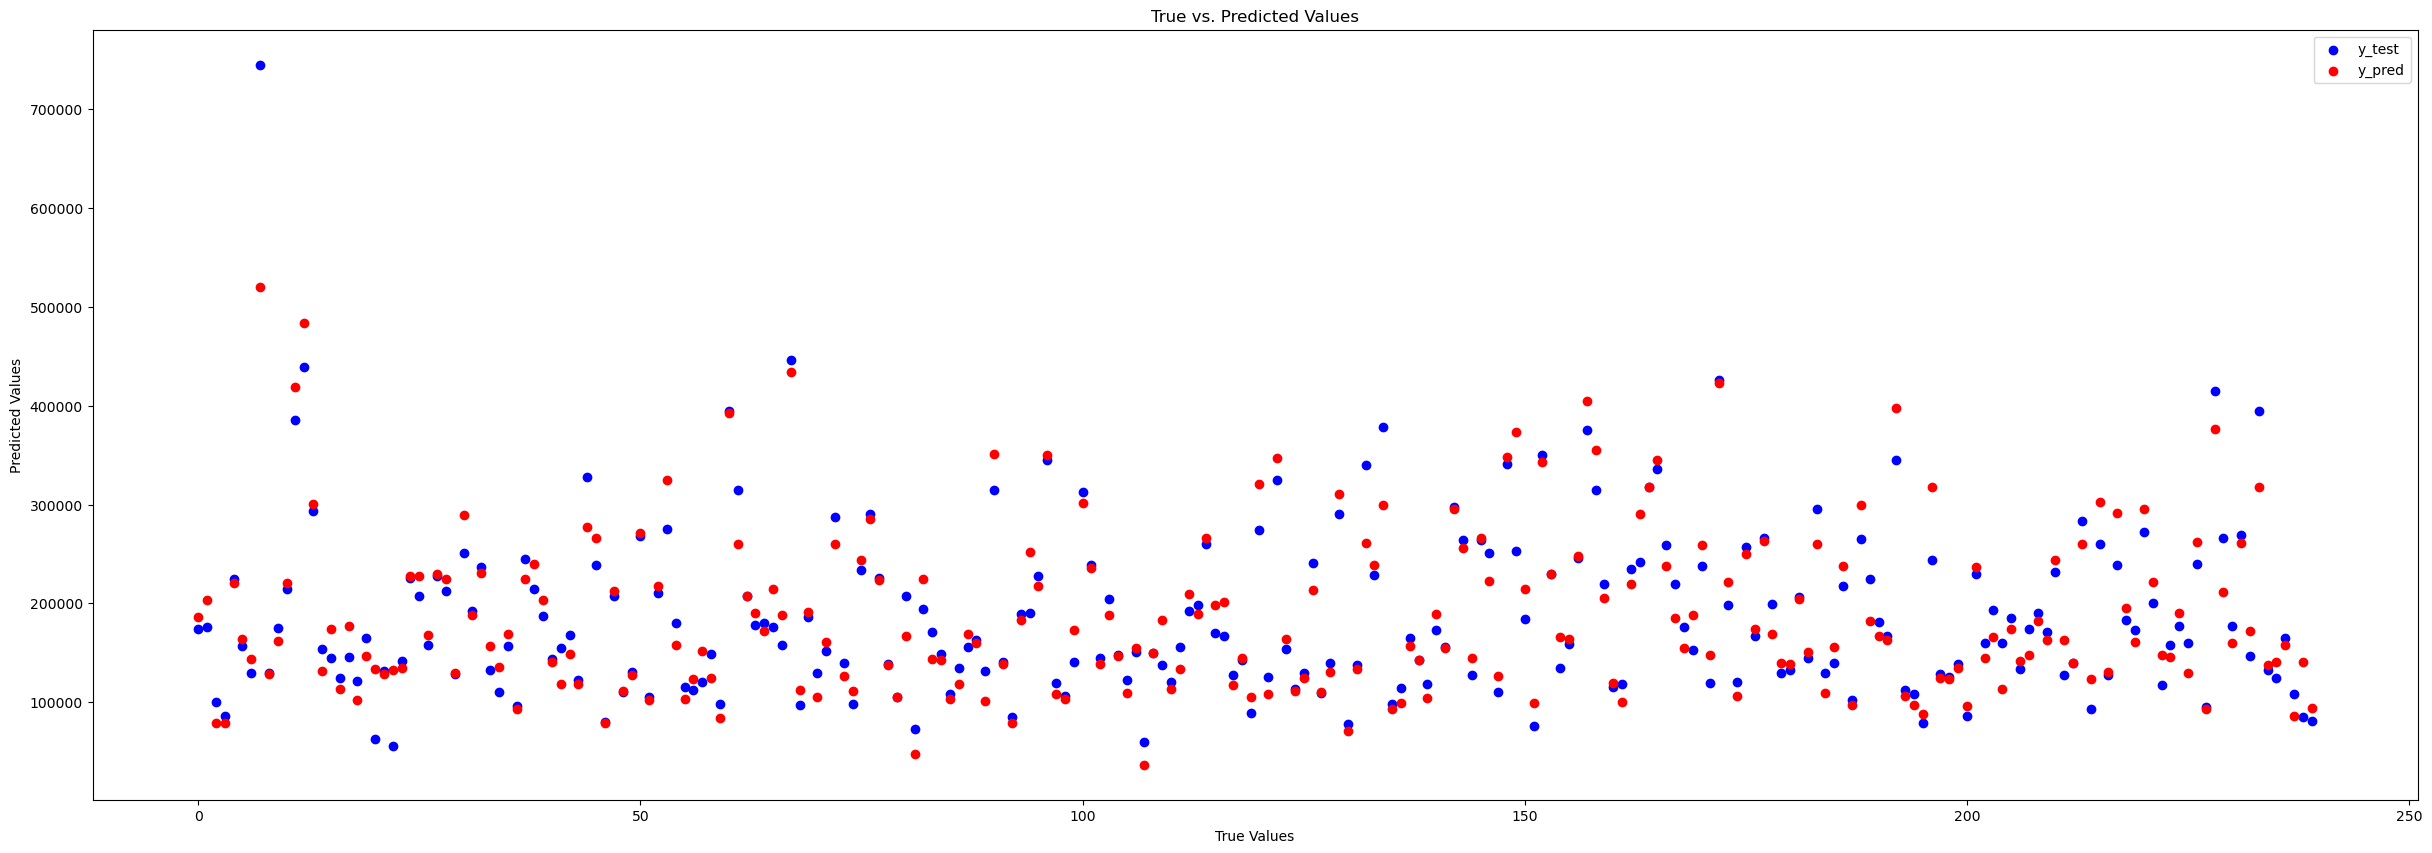

In [77]:

model_lR = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
}
model_lR_gs = GridSearchCV(model_lR,param_grid, scoring='neg_mean_squared_error', cv=10)

model_lR_gs.fit(X_train,y_train)

y_pred_lr=model_lR_gs.predict(X_test)


maelr = mean_absolute_error(y_test, y_pred_lr)
print(f'Mae LR : {maelr:.2f}')
mselr = mean_squared_error(y_test, y_pred_lr)
print(f'mse LR: {mselr:.2f}')
rmselr = mean_squared_error(y_test, y_pred_lr,squared=False)
print(f'rmse LR: {rmselr:.2f}')
r2lr = r2_score(y_test, y_pred_lr)
print(f'R2 LR: {r2lr:.2f}')
print()

print('y_pred_LR')
plt.figure(figsize=[30,10])
plt.scatter(range(len(y_test)), y_test, color='blue', label='y_test')
plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='red', label='y_pred')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()


In [79]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.1) 

lasso.fit(X_train, y_train)

predictions_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, predictions_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("RMSE Lasso:", rmse_lasso)

RMSE Lasso: 29236.388237332627


In [80]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1) 
ridge.fit(X_train, y_train)

predictions_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, predictions_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("RMSE Ridge:", rmse_ridge)

RMSE Ridge: 29245.171770798457
